
# Gradient Boosting regression


Demonstrate Gradient Boosting on the Boston housing dataset.

This example fits a Gradient Boosting model with least squares loss and
500 regression trees of depth 4.



In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
# Load data
from sklearn import datasets

boston = datasets.load_boston()
dataset = pd.DataFrame(boston.data,columns=boston.feature_names)
dataset = pd.concat([dataset,pd.Series(boston.target,name='MEDV')],axis=1)
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

#Splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .10, random_state = 42, shuffle = True)

In [119]:
# Fit regression model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators = 500, max_depth = 4, min_samples_split = 2, learning_rate = 0.01, loss = 'ls')

clf.fit(X_train, Y_train)
mse = mean_squared_error(Y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 5.5123


Text(0, 0.5, 'Deviance')

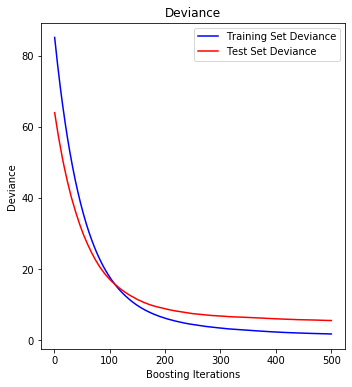

In [120]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(Y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [121]:
# Plot feature importance
feature_importance = clf.feature_importances_

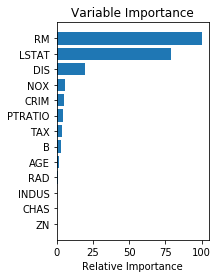

In [122]:
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()